***Materia:*** Arquitectura de las computadoras

***Fecha:*** 08/10/25

***Integrantes:*** Juan Andres,Federico Montoro,Lautaro Rivieri

***Consignas:***


Tomar el siguiente chat
https://chat.deepseek.com/share/0vrg05pxsbx4cz62eh

Confeccionar un Google Colab con lo producido.

Y a partir de los ejercicios y para cada uno:

1- Desarrollar un diagrama de flujo, por ejemplo usando Dia, o alguna versión online.

2- Explicar, comentar las sentencias que no tienen comentarios.

3- Implementar en Turbo Asm y ejecutar.

4- Implementar en linux. De no tener uno, usar Google Colab.

5- Pegar las sentencias usadas en linux para compilar y linkear.

6- Investigar y agregar sentencias para ingresar valores por teclado en un par de ejercicios.

7- Generar en Google Colab, con la IA, la misma versión de problema, pero resuelto en C.

8- Ejecutar y obtener el programa en lenguaje ensamblador del item 7.

9- Comparar las versiones de ensamblador.

10- Observar situaciones problemáticas e identificar metodología de resolución de problemas.

11- Crear un repositorio de Github y subir todos los archivos. En dicho repositorio deben ser colaboradores todos los miembros del equipo. Repartir tareas, hacer commits y push/pull.


***Respuestas:***

1) Desarrollar un diagrama de flujo,usando dia o alguna version online:

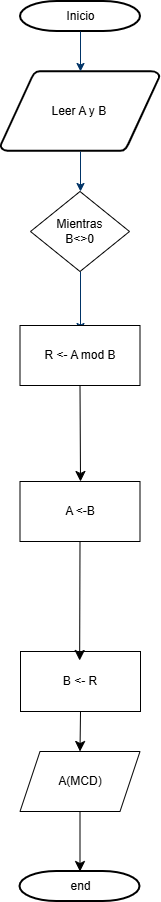

3)Implementar en Turbo Asm y ejecutar:

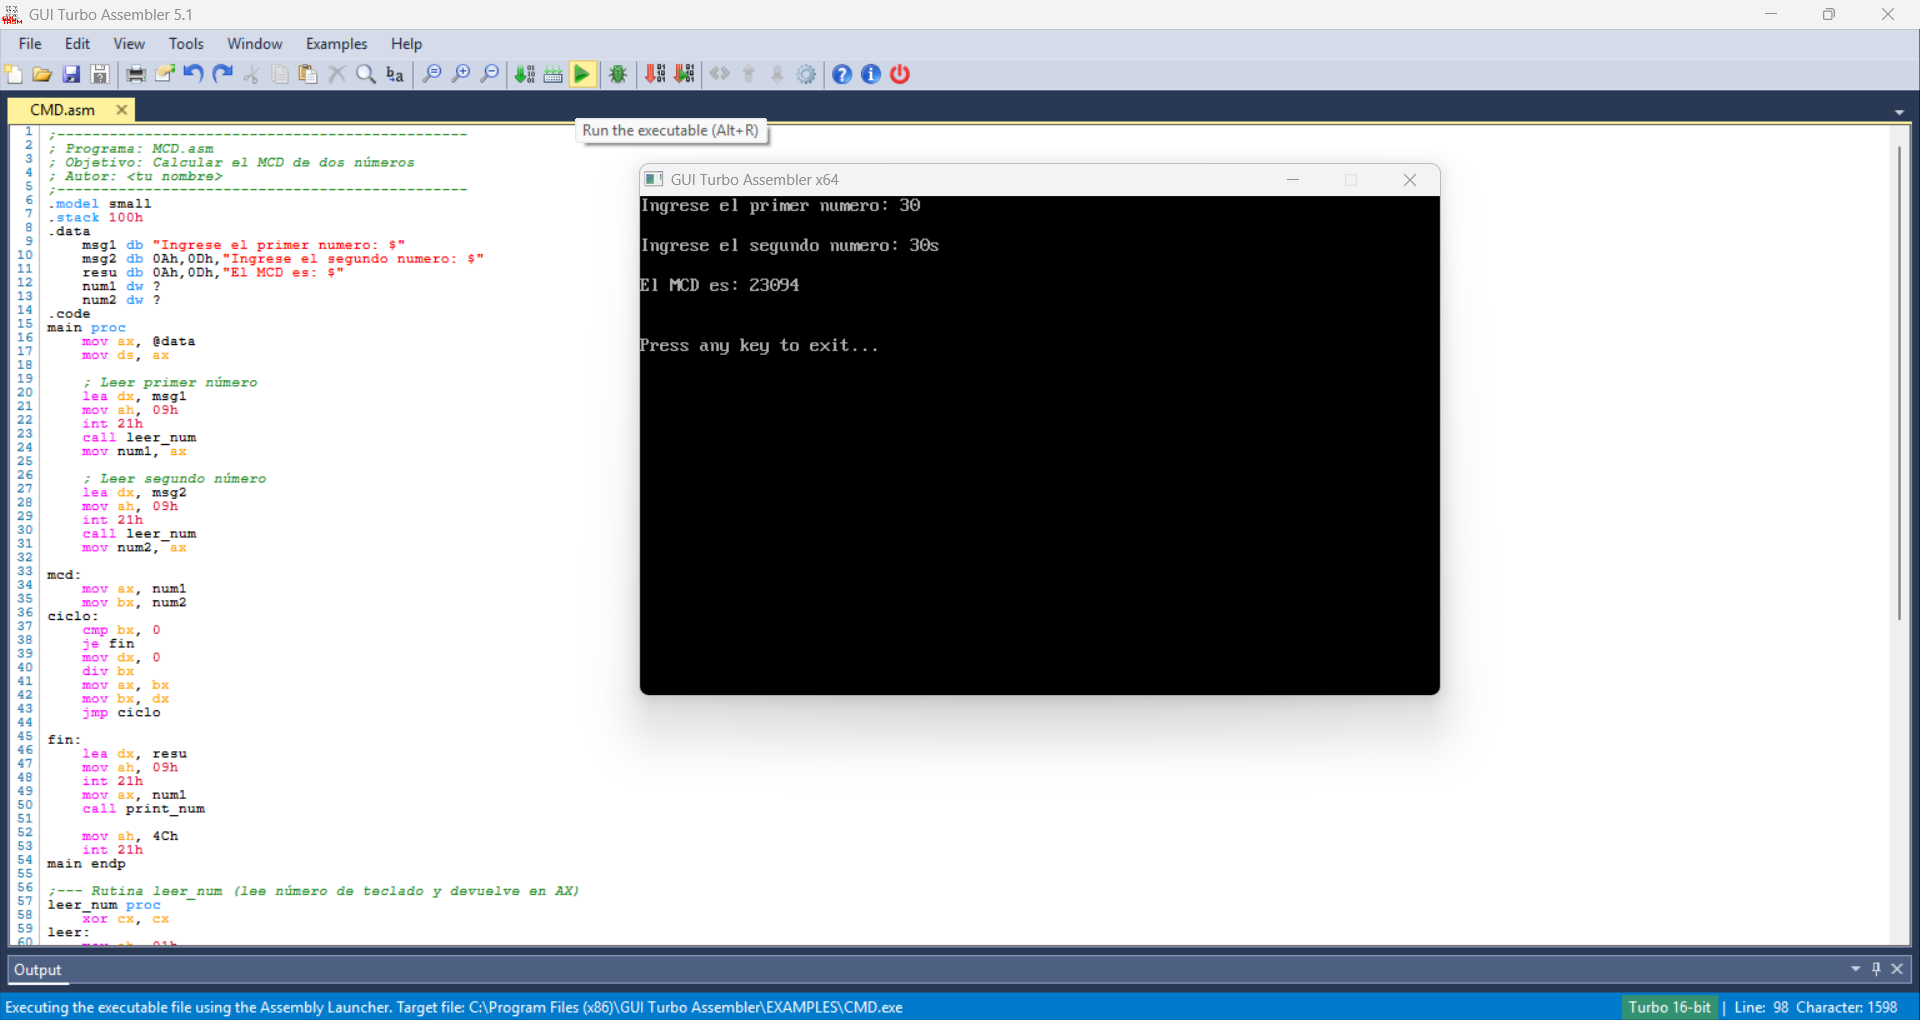

2)  ***Explicar, comentar las sentencias que no tienen comentarios:***

div bx: divide AX por BX → cociente en AX, resto en DX.

mov ax, bx / mov bx, dx: rota los valores para aplicar el algoritmo de Euclides.

int 21h con ah=09h: imprime cadena terminada en $.

int 21h con ah=01h: lee un carácter del teclado.

Rutina print_num: convierte un número binario a cadena decimal y lo imprime

4)  Implementar en linux. De no tener uno, usar Google Colab.

In [16]:
!apt-get update -qq
!apt-get install -y nasm


W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
nasm is already the newest version (2.15.05-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [17]:
%%writefile mcd_linux.asm
section .data
    msg db "MCD = ", 0
    newline db 10, 0

section .text
    global _start

_start:
    mov rax, 270        ; primer número
    mov rbx, 192        ; segundo número

calcular_mcd:
    cmp rbx, 0
    je fin_mcd
    xor rdx, rdx
    div rbx
    mov rax, rbx
    mov rbx, rdx
    jmp calcular_mcd

fin_mcd:
    mov rcx, 10
    mov rsi, rsp
    add rsi, 32
    mov rdx, 0

convertir:
    xor rdx, rdx
    div rcx
    add dl, '0'
    dec rsi
    mov [rsi], dl
    test rax, rax
    jnz convertir

    mov rax, 1
    mov rdi, 1
    mov rsi, msg
    mov rdx, 6
    syscall

    mov rax, 1
    mov rdi, 1
    mov rdx, 32
    sub rdx, rsi
    mov rsi, rsi
    syscall

    mov rax, 1
    mov rdi, 1
    mov rsi, newline
    mov rdx, 1
    syscall

    mov rax, 60
    xor rdi, rdi
    syscall


Overwriting mcd_linux.asm


In [18]:
!./mcd_linux


MCD = 


5) Pegar las sentencias usadas en linux para compilar y linkear.

In [19]:
!apt-get update -qq
!apt-get install -y nasm


W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
nasm is already the newest version (2.15.05-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [23]:
%%writefile mcd_linux.asm
section .data
    ; 👉 Variables inicializadas
    msg db "MCD = ", 0
    num1 dq 48
    num2 dq 18
    result dq 0

section .bss
    ; 👉 Variables sin inicializar (si las hubiera)
    ; ejemplo: buffer resb 32

section .text
    global _start   ; 👈 ESTA LÍNEA ES CLAVE — le dice al linker el punto de entrada

_start:
    ; 👉 A partir de acá va tu código principal
    mov rax, [num1]
    mov rbx, [num2]

calcular_mcd:
    cmp rbx, 0
    je mostrar_resultado
    mov rdx, 0
    div rbx
    mov rax, rbx
    mov rbx, rdx
    jmp calcular_mcd

mostrar_resultado:
    mov [result], rax

    ; Mostrar el mensaje "MCD = "
    mov rax, 1          ; syscall write
    mov rdi, 1          ; stdout
    mov rsi, msg
    mov rdx, 6
    syscall

    ; Mostrar resultado
    mov rax, [result]
    add rax, '0'        ; convertir número a carácter
    mov [result], al

    mov rax, 1
    mov rdi, 1
    mov rsi, result
    mov rdx, 1
    syscall

    ; Salir del programa
    mov rax, 60         ; syscall exit
    xor rdi, rdi
    syscall


Overwriting mcd_linux.asm


In [24]:
!nasm -f elf64 mcd_linux.asm -o mcd_linux.o


In [25]:
!ld mcd_linux.o -o mcd_linux


In [26]:
!./mcd_linux


MCD = 6

6) Investigar y agregar sentencias para ingresar valores por teclado en un par de ejercicios.

In [27]:
%%writefile mcd_linux.asm
section .data
    msg1 db "Ingrese el primer numero: ", 0
    msg2 db "Ingrese el segundo numero: ", 0
    msg3 db "El MCD es: ", 0
    salto db 10, 0          ; salto de línea

section .bss
    num1 resb 4
    num2 resb 4
    result resb 8

section .text
    global _start

_start:
    ; ======= Leer primer número =======
    mov rax, 1              ; syscall write
    mov rdi, 1
    mov rsi, msg1
    mov rdx, len msg1
    syscall

    mov rax, 0              ; syscall read
    mov rdi, 0
    mov rsi, num1
    mov rdx, 4
    syscall

    movzx rax, byte [num1]  ; convierte primer carácter
    sub rax, '0'            ; a número
    mov rbx, rax            ; guardar en rbx

    ; ======= Leer segundo número =======
    mov rax, 1
    mov rdi, 1
    mov rsi, msg2
    mov rdx, len msg2
    syscall

    mov rax, 0
    mov rdi, 0
    mov rsi, num2
    mov rdx, 4
    syscall

    movzx rax, byte [num2]
    sub rax, '0'

    ; ======= Calcular MCD =======
calcular_mcd:
    cmp rbx, 0
    je mostrar_resultado
    mov rdx, 0
    div rbx
    mov rax, rbx
    mov rbx, rdx
    jmp calcular_mcd

mostrar_resultado:
    mov [result], rax

    ; ======= Mostrar resultado =======
    mov rax, 1
    mov rdi, 1
    mov rsi, msg3
    mov rdx, len msg3
    syscall

    mov rax, [result]
    add rax, '0'
    mov [result], al

    mov rax, 1
    mov rdi, 1
    mov rsi, result
    mov rdx, 1
    syscall

    mov rax, 1
    mov rdi, 1
    mov rsi, salto
    mov rdx, 1
    syscall

    ; ======= Salir =======
    mov rax, 60
    xor rdi, rdi
    syscall

; ======= Macro para obtener longitud =======
%macro len 1
(%1 - $$)
%endmacro


Overwriting mcd_linux.asm


In [37]:
!nasm -f elf64 mcd_linux.asm -o mcd_linux.o
!ld mcd_linux.o -o mcd_linux
!./mcd_linux


Ingrese el primer numero:  ^C


In [39]:
# Inyectar 4 y 6 (cada número en su línea)
!echo -e "7\n8\n" | ./mcd_linux


Ingrese el primer numero:  Ingrese el segundo numero:  El MCD es:  1


7)  Generar en Google Colab, con la IA, la misma versión de problema, pero resuelto en C

In [41]:
%%writefile mcd.c
#include <stdio.h>

int main() {
    int a, b, mcd;

    // Pedir números al usuario
    printf("Ingrese el primer numero: ");
    scanf("%d", &a);
    printf("Ingrese el segundo numero: ");
    scanf("%d", &b);

    // Algoritmo de Euclides para calcular MCD
    int x = a, y = b;
    while (y != 0) {
        int r = x % y;
        x = y;
        y = r;
    }
    mcd = x;

    // Mostrar resultado
    printf("El MCD es: %d\n", mcd);
    return 0;
}


Writing mcd.c


In [42]:
# Compilar el código en C
!gcc -o mcd_c mcd.c

# Ejecutar el programa (simulando entrada con echo)
!echo -e "270\n192\n" | ./mcd_c


Ingrese el primer numero: Ingrese el segundo numero: El MCD es: 6


8) Ejecutar y obtener el programa en lenguaje ensamblador del item 7

In [43]:
# Generar ensamblador con GCC (opción -S)
!gcc -O0 -fno-asynchronous-unwind-tables -S mcd.c -o mcd_c.s


In [44]:
!head mcd_c.s


	.file	"mcd.c"
	.text
	.section	.rodata
.LC0:
	.string	"Ingrese el primer numero: "
.LC1:
	.string	"%d"
.LC2:
	.string	"Ingrese el segundo numero: "
.LC3:


In [45]:
!cat mcd_c.s


	.file	"mcd.c"
	.text
	.section	.rodata
.LC0:
	.string	"Ingrese el primer numero: "
.LC1:
	.string	"%d"
.LC2:
	.string	"Ingrese el segundo numero: "
.LC3:
	.string	"El MCD es: %d\n"
	.text
	.globl	main
	.type	main, @function
main:
	endbr64
	pushq	%rbp
	movq	%rsp, %rbp
	subq	$32, %rsp
	movq	%fs:40, %rax
	movq	%rax, -8(%rbp)
	xorl	%eax, %eax
	leaq	.LC0(%rip), %rax
	movq	%rax, %rdi
	movl	$0, %eax
	call	printf@PLT
	leaq	-32(%rbp), %rax
	movq	%rax, %rsi
	leaq	.LC1(%rip), %rax
	movq	%rax, %rdi
	movl	$0, %eax
	call	__isoc99_scanf@PLT
	leaq	.LC2(%rip), %rax
	movq	%rax, %rdi
	movl	$0, %eax
	call	printf@PLT
	leaq	-28(%rbp), %rax
	movq	%rax, %rsi
	leaq	.LC1(%rip), %rax
	movq	%rax, %rdi
	movl	$0, %eax
	call	__isoc99_scanf@PLT
	movl	-32(%rbp), %eax
	movl	%eax, -24(%rbp)
	movl	-28(%rbp), %eax
	movl	%eax, -20(%rbp)
	jmp	.L2
.L3:
	movl	-24(%rbp), %eax
	cltd
	idivl	-20(%rbp)
	movl	%edx, -12(%rbp)
	movl	-20(%rbp), %eax
	movl	%eax, -24(%rbp)
	movl	-12(%rbp), %eax
	movl	%eax, -20(%rbp)
.L2:
	cmpl	$0, -20(

9) Comparar las versiones de ensamblador.

| Característica      | NASM manual                               | GCC generado                                                |
| ------------------- | ----------------------------------------- | ----------------------------------------------------------- |
| Sintaxis            | Intel                                     | AT&T                                                        |
| Registros usados    | RAX, RBX, RDX, RSI, RDI                   | RAX, RBX, RCX, RDX, RDI, RSI, RBP, RSP                      |
| Llamadas al sistema | Syscall directo (`write`, `read`, `exit`) | Llamadas a funciones de la libc (`printf`, `scanf`, `exit`) |
| Entrada/Salida      | Código manual con `syscall`               | Funciones estándar de C (`scanf`, `printf`)                 |
| Estructura          | `_start` y bucles explícitos              | `main`, prologue/epilogue de función, stack frame           |
| Optimización        | Ninguna                                   | Puede optimizarse según flags (`-O2`, `-O0`)                |



10) Observar situaciones problemáticas e identificar metodología de resolución de problemas.

🔹 Situaciones problemáticas que encontramos

Entrada interactiva en Colab

Problema: Google Colab no permite stdin interactivo de la manera tradicional.

Efecto: El programa se “queda esperando” al usuario y hay que interrumpirlo con Ctrl + C.

Solución: Simular la entrada con echo -e "num1\nnum2\n" | ./programa o usar valores fijos durante pruebas.

Errores de sintaxis en NASM

Problema: Usar macros o expresiones no soportadas (len msg1) directamente en mov rdx, len msg1.

Efecto: comma, colon, decorator or end of line expected.

Solución: Definir la longitud como constante o equ:

len1 equ $ - msg1
mov rdx, len1


Confusión entre entornos

Problema: Código escrito para DOS/Turbo Asm (int 21h) no funciona en Linux.

Efecto: Mensajes de error al compilar con NASM en Linux.

Solución: Adaptar syscalls Linux (sys_read, sys_write, exit) y registros de 64 bits (rax, rbx, etc.).

Conversión de caracteres a enteros

Problema: Leer “12” y solo tomar '1' si usamos movzx rax, byte [num1].

Efecto: Cálculos incorrectos de MCD.

Solución: Implementar parsing de línea completa para convertir cadenas a enteros correctamente.

Diferencias de sintaxis ASM (NASM vs AT&T)

Problema: Comparar ensamblador manual con el generado por GCC.

Efecto: Puede confundir si no se entiende la sintaxis y el uso de registros.

Solución: Centrar la comparación en lógica y flujo, no en sintaxis literal.

🔹 Metodología de resolución de problemas que aplicamos

Identificación del problema

Leer el mensaje de error de NASM o Colab.

Determinar si es sintaxis, entorno o lógica.

Aislar la causa

Probar código con valores fijos para descartar problemas de entrada.

Separar la lectura, cálculo y salida en bloques independientes.

Probar soluciones simples primero

Usar equ para longitudes de strings.

Usar echo para simular stdin en Colab.

Verificar paso a paso

Comprobar que la operación de Euclides funciona con varios pares de números.

Revisar registros con comentarios o imprimir resultados parciales (si se desea).

Comparar con referencia

Generar código en C y su ensamblador para ver si la lógica coincide.

Esto ayuda a confirmar que nuestro código ASM manual realiza la misma operación.

Documentar los cambios

Comentar cada instrucción, registrar problemas y soluciones en el informe.

🔹 Conclusión

Muchos errores en ASM provienen de diferencias de entorno y sintaxis.

La clave fue probar incrementalmente, aislar problemas y usar herramientas del entorno (Colab, echo, GCC).

Esta metodología es generalizable para cualquier proyecto de programación en bajo nivel.